# UUIDs
## Background
Universally Unique Identifiers (UUIDs) provide convenient mechanisms for identifying pieces of information (objects) inside an information system. Various conventions exist. However, general patterns have been established and formalized as RFC 4122.

Comprised of hex digits, UUIDs have the pattern `8-4-4-4-12`, e.g. `e45ba2cc-39db-11e9-8e62-7470fdf23ef1`.

It adds up to 36 characters (32 hex + 4 hyphens), or 16 bytes of information (128 bits).

Python provides a [UUID module](https://docs.python.org/3/library/uuid.html) in its standard library.

In [2]:
import uuid

In [3]:
help(uuid.uuid1)

Help on function uuid1 in module uuid:

uuid1(node=None, clock_seq=None)
    Generate a UUID from a host ID, sequence number, and the current time.
    If 'node' is not given, getnode() is used to obtain the hardware
    address.  If 'clock_seq' is given, it is used as the sequence number;
    otherwise a random 14-bit sequence number is chosen.



In [5]:
uuid.uuid1()

UUID('1925e366-2636-11ec-8d4c-acde48001122')

In [6]:
# use the current hardware address and time
[uuid.uuid1() for _ in range(8)]

[UUID('2188acd2-2636-11ec-8d4c-acde48001122'),
 UUID('2188ad54-2636-11ec-8d4c-acde48001122'),
 UUID('2188ad7c-2636-11ec-8d4c-acde48001122'),
 UUID('2188ad9a-2636-11ec-8d4c-acde48001122'),
 UUID('2188adb8-2636-11ec-8d4c-acde48001122'),
 UUID('2188adcc-2636-11ec-8d4c-acde48001122'),
 UUID('2188adea-2636-11ec-8d4c-acde48001122'),
 UUID('2188adfe-2636-11ec-8d4c-acde48001122')]

In [7]:
# use the current hardware address and time
[uuid.uuid1() for _ in range(5)]

[UUID('50f4be8e-2636-11ec-8d4c-acde48001122'),
 UUID('50f4bf10-2636-11ec-8d4c-acde48001122'),
 UUID('50f4bf38-2636-11ec-8d4c-acde48001122'),
 UUID('50f4bf56-2636-11ec-8d4c-acde48001122'),
 UUID('50f4bf6a-2636-11ec-8d4c-acde48001122')]

In [17]:
# use fixed values
[uuid.uuid1(3, 1) for _ in range(5)]

[UUID('b3079204-2636-11ec-8001-000000000003'),
 UUID('b3079286-2636-11ec-8001-000000000003'),
 UUID('b30792b8-2636-11ec-8001-000000000003'),
 UUID('b30792e0-2636-11ec-8001-000000000003'),
 UUID('b3079308-2636-11ec-8001-000000000003')]

In [14]:
help(uuid.uuid1)

Help on function uuid1 in module uuid:

uuid1(node=None, clock_seq=None)
    Generate a UUID from a host ID, sequence number, and the current time.
    If 'node' is not given, getnode() is used to obtain the hardware
    address.  If 'clock_seq' is given, it is used as the sequence number;
    otherwise a random 14-bit sequence number is chosen.



In [18]:
help(uuid.uuid3)

Help on function uuid3 in module uuid:

uuid3(namespace, name)
    Generate a UUID from the MD5 hash of a namespace UUID and a name.



In [19]:
help(uuid.uuid5)

Help on function uuid5 in module uuid:

uuid5(namespace, name)
    Generate a UUID from the SHA-1 hash of a namespace UUID and a name.



In [20]:
top = uuid.UUID('00000000-0000-0000-0000-000000000000')


In [24]:
top

UUID('00000000-0000-0000-0000-000000000000')

In [25]:
topic = uuid.uuid5(top, 'Neuroscience')
topic

UUID('913e0174-a390-5c08-b50a-623690546dd5')

In [27]:
subject1 = uuid.uuid5(topic, 'Habenula')
subject1

UUID('b5804c3f-57b1-54e3-8176-3b45aa443a97')

In [ ]:
top = uuid.UUID('00000000-0000-0000-0000-000000000000')
topic = uuid.uuid5(top, 'Neuroscience')
subject1 = uuid.uuid5(topic, 'Habenula')
subject2 = uuid.uuid5(topic, 'Entorhinal cortex')
subject3 = uuid.uuid5(topic, 'Habenula')

topic = uuid.uuid5(top, 'Philosophy')
subject4 = uuid.uuid5(topic, 'Habenula')

topic, subject1, subject2, subject3, subject4

In [ ]:
uuid.uuid5(subject4, 'study'*1000000)

In [29]:
help(uuid.uuid4)

Help on function uuid4 in module uuid:

uuid4()
    Generate a random UUID.



In [30]:
[uuid.uuid4() for _ in range(12)]

[UUID('795336f7-cf96-4705-a9d7-4ab2e941477e'),
 UUID('27396d4a-fef9-465a-b361-5b3606bec923'),
 UUID('9560ad9e-d9ae-4f55-9cdf-ca4c0501102c'),
 UUID('e1b7dd21-c914-49f9-a03e-8e2c162122c2'),
 UUID('b57aa3e9-1e75-4bbb-aeea-95313c2fcebc'),
 UUID('8e585de2-4947-4dc1-81e3-cebe051a70bf'),
 UUID('b9ad6070-b7cb-4145-b897-5b18db3ea36f'),
 UUID('9d825f1e-c669-48f9-9398-aa1ac89c7b6f'),
 UUID('a2ccf300-d4d5-425a-be0c-975637a8a3e4'),
 UUID('8b1c4a30-0f63-47f9-9220-45a4813170e6'),
 UUID('eb537ec2-f1db-4f11-9738-146ba14183e8'),
 UUID('a69d1373-16cd-4000-ae5a-fc3028b39d85')]

In [ ]:
a

In [ ]:
s

In [ ]:
uuid.UUID(s)

## UUIDs in DataJoint

In [31]:
import datajoint as dj
dj.__version__

'0.13.3'

In [32]:
schema = dj.schema('dimitri_uuid')

Connecting dimitri@db.ust-db.link:3306


In [33]:
@schema
class Message(dj.Manual):
    definition = """
    message_id : uuid  # internal message id
    ---
    message_body : varchar(1000) 
    """

In [34]:
Message.describe();

message_id           : uuid                         # internal message id
---
message_body         : varchar(1000)                



In [35]:
# For the curious: Internally, DataJoint represents uuids as BINARY(16) 
Message.heading['message_id'].sql

'`message_id` binary(16) NOT NULL COMMENT ":uuid:internal message id"'

In [39]:
Message.insert1((uuid.uuid1(), 'Hello, world!'))
Message.insert1((uuid.uuid1(), 'Cogito ergo sum'))

In [40]:
Message()

message_id internal message id,message_body
b11b840e-2637-11ec-8d4c-acde48001122,"Hello, world!"
b12209e6-2637-11ec-8d4c-acde48001122,Cogito ergo sum
b619a5f8-2637-11ec-8d4c-acde48001122,"Hello, world!"
b61ff688-2637-11ec-8d4c-acde48001122,Cogito ergo sum
bf319fce-2637-11ec-8d4c-acde48001122,"Hello, world!"
bf3808aa-2637-11ec-8d4c-acde48001122,Cogito ergo sum


In [41]:
Message.insert1((uuid.uuid1(), 'I will be back'))
Message.insert1((uuid.uuid1(), 'Must destroy humans.'))

In [62]:
b = uuid.uuid4().bytes
b

b'\x94\xc9\xd1\xe32\xc8A9\x8e|\xdc<\xf6t@\xc9'

In [64]:
uuid.UUID(bytes=b)

UUID('94c9d1e3-32c8-4139-8e7c-dc3cf67440c9')

In [42]:
Message()

message_id internal message id,message_body
b11b840e-2637-11ec-8d4c-acde48001122,"Hello, world!"
b12209e6-2637-11ec-8d4c-acde48001122,Cogito ergo sum
b619a5f8-2637-11ec-8d4c-acde48001122,"Hello, world!"
b61ff688-2637-11ec-8d4c-acde48001122,Cogito ergo sum
bf319fce-2637-11ec-8d4c-acde48001122,"Hello, world!"
bf3808aa-2637-11ec-8d4c-acde48001122,Cogito ergo sum
cb31b368-2637-11ec-8d4c-acde48001122,I will be back
cb381bfe-2637-11ec-8d4c-acde48001122,Must destroy humans.


In [49]:
Message.insert1((uuid.uuid4(), 'Hasta la vista baby'))

In [50]:
Message()

message_id internal message id,message_body
0ab5f288-009c-46f6-9ecc-e7b0c507ba40,Hasta la vista baby
26c62e72-6166-461b-86c9-552825b7549c,Hasta la vista baby
871e0383-d86d-439e-bc2f-a99faefabffc,Hasta la vista baby
b11b840e-2637-11ec-8d4c-acde48001122,"Hello, world!"
b12209e6-2637-11ec-8d4c-acde48001122,Cogito ergo sum
b619a5f8-2637-11ec-8d4c-acde48001122,"Hello, world!"
b61ff688-2637-11ec-8d4c-acde48001122,Cogito ergo sum
bf319fce-2637-11ec-8d4c-acde48001122,"Hello, world!"
bf3808aa-2637-11ec-8d4c-acde48001122,Cogito ergo sum
c64f1614-9661-4dda-8625-affb19a64d2a,Hasta la vista baby


In [51]:
@schema
class Comment(dj.Manual):
    definition = """
    comment_id : uuid
    --- 
    -> Message
    comment_body : varchar(1000)
    """

In [ ]:
# For the curious: This is how the table was declared in SQL
print(schema.connection.query('show create table `dimitri_uuid`.`comment`').fetchall()[0][1])

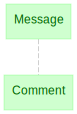

In [52]:
dj.Diagram(schema)

In [53]:
keys = Message.fetch('KEY')

In [54]:
keys

[{'message_id': UUID('0ab5f288-009c-46f6-9ecc-e7b0c507ba40')},
 {'message_id': UUID('26c62e72-6166-461b-86c9-552825b7549c')},
 {'message_id': UUID('871e0383-d86d-439e-bc2f-a99faefabffc')},
 {'message_id': UUID('b11b840e-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('b12209e6-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('b619a5f8-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('b61ff688-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('bf319fce-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('bf3808aa-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('c64f1614-9661-4dda-8625-affb19a64d2a')},
 {'message_id': UUID('cb31b368-2637-11ec-8d4c-acde48001122')},
 {'message_id': UUID('cb381bfe-2637-11ec-8d4c-acde48001122')}]

In [55]:
Comment.insert1(dict(keys[0], comment_id=uuid.uuid1(), comment_body="thank you"))

In [57]:
Message* Comment

message_id internal message id,comment_id,message_body,comment_body
0ab5f288-009c-46f6-9ecc-e7b0c507ba40,2a801b8e-2638-11ec-8d4c-acde48001122,Hasta la vista baby,thank you


In [ ]:
Message * Comment & keys[0]

In [ ]:
Message & keys[1:4]

In [ ]:
Comment.insert1(dict(keys[1], comment_id=uuid.uuid1(), comment_body="thank you"))

In [ ]:
Comment()

In [ ]:
Message & Comment

In [ ]:
Message * Comment